# Breeden, Litzenberger (1978): Prices of State-Contingent Claims Implicit in Option Prices

Breeden, Douglas T.; Litzenberger, Robert H.: “Prices of State-Contingent Claims Implicit in Option Prices". The Journal of Business, vol. 51, no. 4, 1978, pp. 621–651. [www.jstor.org/stable/2352653](https://www.jstor.org/stable/2352653)


This paper proves the fundamental results:

- The knowledge of European vanilla call (and put) options 
$$c(K,T), \forall K, \forall T$$ 
is equivalent to the knowledge of the risk-neutral probability distribution of $S_T, \forall T$

- The risk-neutral probability density function for $T$ is given by
$$\psi_T(K) = \frac{1}{B(0,T)} \frac{\partial^2 c}{\partial^2 K}$$

where $B(0,T)$ is the price of the zero-coupon bond for maturity $T$.

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,10)

Primitive securities pay $1$ contingent upon a given state of the world at a given
date and zero otherwise. Given the prices of primitive securities, the value of 
any payoff can be calculated.

Let a primitive security that pays $1$ at  time $T$ if the value of the underlying asset $S_T$ is $M$, and zero
otherwise has payoff $p(S,T)$ and value $P_t(M,T)$ at time $t$.

The payoff function is thus:
$$p(M,T)=1 \mbox{, } p(S,T)=0 \mbox{ } \forall S\neq M$$

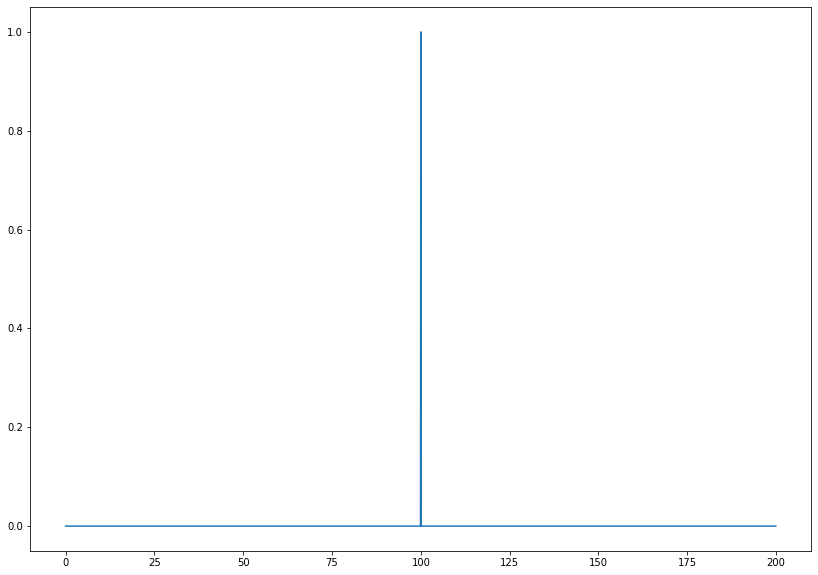

In [2]:
M = 100
S = np.arange(0, 200, 0.1)

i = np.where(S==100)
payoffs = np.zeros_like(S)
payoffs[i] = 1

plt.figure()
plt.plot(S, payoffs)
plt.show()

The paper proceeds by approximating the primitive security payoff by a `Butterfly spread` strategy:

- long $\frac{1}{\delta}$ call with strike $M-\delta$, 
- long $\frac{1}{\delta}$ call with strike $M+\delta$, 
- short $\frac{2}{\delta}$ calls with strike $M$,

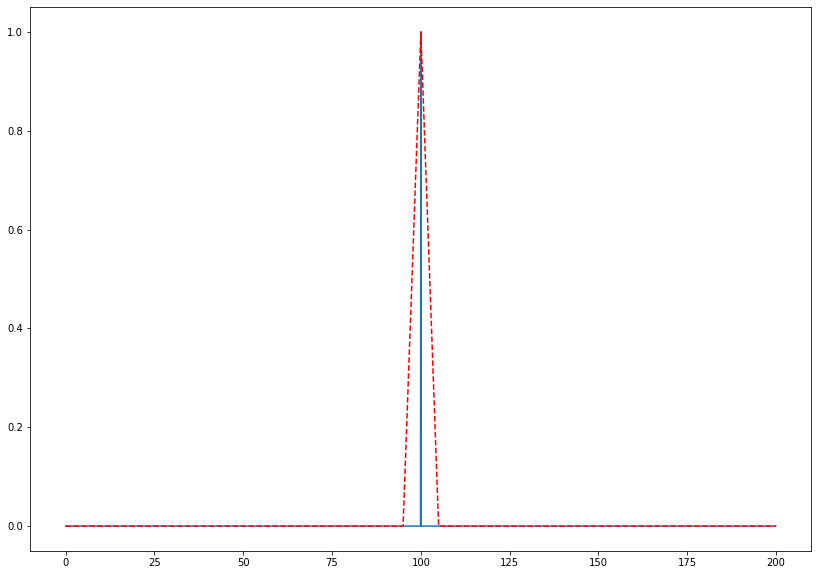

In [3]:
M = 100
delta = 5
S = np.arange(0, 200, 0.1)

i = np.where(S==100)
payoffs = np.zeros_like(S)
payoffs[i] = 1

call_plus_delta = np.maximum(S-M-delta,0)
call_minus_delta = np.maximum(S-M+delta,0)
call = np.maximum(S-M,0)

butterfly = (1/delta) * (call_plus_delta + call_minus_delta - 2*call)

plt.figure()
plt.plot(S, payoffs)
plt.plot(S, butterfly, color='red', linestyle='dashed')
plt.show()

Let $c(K,T)$ be the payoff of a European call with strike $K$ and maturity $T$ 
and $c_t(K,T)$ its value at time $t$.

So, we have that 
$$P(M,T) \approx \frac{ \left[c(M+\delta,T) - c(M,T)\right] - \left[c(M,T) - c(M-\delta,T)\right] }{\delta}$$

Given the butterfly spread gives an arbitrarily close payoff to the primitive security given a small $\delta$, 
we can deduce that the price of the primitive security is approximated by the value of the butterfly spread. 

Since $\delta$ is small, we can assume that $\psi(S) \approx \psi(M), \mbox{ } \forall S \in (M-\delta, M+\delta)$. Given the value is given by the discounted expected cash flows under the risk-neutral measure, and the area under the curve is $\delta$ we can deduce the value is
$$B(t,T)\delta \psi(M)$$
and hence
$$B(t,T)\delta \psi(M) \approx \frac{ \left[c_t(M+\delta,T) - c_t(M,T)\right] - \left[c_t(M,T) - c_t(M-\delta,T)\right] }{\delta}$$
Dividing by $B(t,T) \delta$ on both sides:
$$\psi(M) \approx \frac{1}{B(t,T)} \frac{ \left[c_t(M+\delta,T) - c_t(M,T)\right] - \left[c_t(M,T) - c_t(M-\delta,T)\right] }{\delta^2}$$


In the limit, as $\delta$ tends to zero, we have
$$\psi(M) = \lim_{\delta\rightarrow 0}\frac{1}{B(t,T)} \frac{ \left[c_t(M+\delta,T) - c_t(M,T)\right] - \left[c_t(M,T) - c_t(M-\delta,T)\right] }{\delta^2} = \frac{1}{B(t,T)} \frac{\partial^2 c}{\partial^2 K}$$